# Explore results after scraping results website

### User variables


In [1]:
Date = '2020-01' # yyyy-mm
toggle_to_opbod = True

### Modules and functions

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display,Image

### Load results

Load auction results and data from rdw.

In [3]:
if toggle_to_opbod:
    file_name = '../../../python-nb/data/drz-data-opbod-{}.pkl'.format(Date)
else:
    file_name = '../data/drz-data-{}.pkl'.format(Date)
print(file_name)
drz = pd.read_pickle(file_name)

if toggle_to_opbod:
    file_name = '../../../python-nb/data/rdw-data-opbod-{}.pkl'.format(Date)
else:
    file_name = '../data/rdw-data-{}.pkl'.format(Date)
print(file_name)
rdw = pd.read_pickle(file_name)

# rdw column names
#   NOTE: format changed in April 2019: RDW info is appended to auction results as extra columns in dataframe
if pd.to_datetime(Date, format='%Y-%m') >= pd.to_datetime('2019-04', format='%Y-%m'):
    rdwinfo = [c for c in rdw.columns if c.startswith('rdw_')]

# fix odometer
if pd.to_datetime(Date, format='%Y-%m') == pd.to_datetime('2019-09', format='%Y-%m'):
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch') | (rdw.OdoKM == 'volgens nap onlogisch')
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    
    idx = '2019-9-9106'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'logisch'
    rdw.loc[idx,'NAP'] = 'logisch'
    drz.loc[idx,'OdoKM'] = '251.571'
    rdw.loc[idx,'OdoKM'] = '251.571'
    
    display(drz.loc[[idx],['Title', 'OdoKM', 'NAP']])
    display(rdw.loc[[idx],['Title', 'OdoKM', 'NAP']])

    idx = '2019-9-9258'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    idx = '2019-9-9249'
    print('\n'.join(drz.loc[idx,'Raw_text']))
    drz.loc[idx,'NAP'] = 'onlogisch'
    rdw.loc[idx,'NAP'] = 'onlogisch'
    drz.loc[idx,'OdoKM'] = ''
    rdw.loc[idx,'OdoKM'] = ''
    
    
    display(rdw.loc[sel, ['Title', 'OdoKM', 'NAP']])
    display(drz.loc[sel, ['Title', 'OdoKM', 'NAP']])
    sel = (rdw.OdoKM == 'volgens NAP logisch') | (rdw.OdoKM == 'volgens NAP onlogisch')
    assert all(~sel)



../../../python-nb/data/drz-data-opbod-2020-01.pkl
../../../python-nb/data/rdw-data-opbod-2020-01.pkl


# Cheap cars with valid inspection

In [4]:
is_cheap = (
    drz.LotType == "Personenauto"
) & (
    drz.Price<3000
) & (
    drz.Price>0
) & ~(
    (
        drz.APKdate.isnull()
    ) | (
        drz.APKdate.apply(lambda x:x == '')
    )
)

drz.loc[is_cheap,
        ["Price","ItemType","ItemBrand","Mfdate","APKdate","OdoKM"]].sort_values(by='OdoKM')

,Price,ItemType,ItemBrand,Mfdate,APKdate,OdoKM
2020-1-1112,1306.0,206; cc 1.6 16v aut.,PEUGEOT,07.05.2004,11.04.2020,103.589
2020-1-1039,705.0,clio; 1.4 16v s2005,RENAULT,11.10.2002,10.07.2020,114.967
2020-1-1169,1161.0,street ka,FORD,16.04.2003,29.04.2020,117.177
2020-1-1916,1060.0,fiat panda; 1.2,FIAT,19.11.2003,09.06.2020,123.089
2020-1-1193,420.0,clio; 1.4,RENAULT,18.01.2001,06.05.2020,128.327
...,...,...,...,...,...,...
2020-1-1036,185.0,clk 230 kompressor; coupe,MERCEDES-BENZ,26.05.1999,06.05.2020,onbekend
2020-1-1956,184.0,megane classic; 1.6 16v,RENAULT,28.02.2000,01.03.2020,onbekend
2020-1-1113,500.0,fiesta; 1.4d 50kw,FORD,08.06.2004,26.09.2020,onbekend
2020-1-1260,444.0,megane scenic; 1.6 16v 83kw au,RENAULT,30.01.2004,17.06.2020,onbekend


In [5]:
if pd.to_datetime(Date, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,["rdwinfo"]])
else:
    display(rdw.loc[is_cheap,rdwinfo])

,rdw_kenteken,rdw_Reg,rdw_voertuigsoort,rdw_merk,rdw_handelsbenaming,rdw_vervaldatum_apk,rdw_datum_tenaamstelling,rdw_bruto_bpm,rdw_inrichting,rdw_aantal_zitplaatsen,...,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_14,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_15,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_16,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_17,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_18,rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_19,rdw_versnellingsbak_uitvoering_type_versnellingsbak_1,rdw_versnellingsbak_uitvoering_aantal_versnellingen_ondergrens_1,rdw_versnellingsbak_uitvoering_aantal_versnellingen_bovengrens_1,rdw_TimeStamp_y
2020-1-1008,29NDTD,29-ND-TD,Personenauto,MERCEDES-BENZ,C 200 CDI,20200223.0,20191231.0,10856.0,sedan,5.0,...,G,G,G,G,G,NaN,H,6.0,6.0,20200111
2020-1-1021,86PPZB,86-PP-ZB,Personenauto,RENAULT,CLIO,20200629.0,20191231.0,2594.0,hatchback,5.0,...,E,E,G,G,G,NaN,H,5.0,5.0,20200111
2020-1-1022,05XXGN,05-XX-GN,Personenauto,TOYOTA,TOYOTA AYGO,20200531.0,20191231.0,1341.0,hatchback,4.0,...,C,C,D,D,D,NaN,H,5.0,5.0,20200111
2020-1-1025,26GRXF,26-GR-XF,Personenauto,VOLKSWAGEN,POLO,20200301.0,20191231.0,2567.0,hatchback,5.0,...,F,F,G,G,G,NaN,H,5.0,5.0,20200111
2020-1-1027,28RSGS,28-RS-GS,Personenauto,BMW,1ER REIHE,20200823.0,20191231.0,6613.0,hatchback,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20200111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-1-1974,62PJSF,62-PJ-SF,Personenauto,VOLKSWAGEN,GOLF,20200310.0,20191030.0,4982.0,hatchback,5.0,...,E,E,F,F,G,NaN,H,5.0,5.0,20200111
2020-1-1975,07NNDD,07-NN-DD,Personenauto,RENAULT,ESPACE,20200305.0,20191030.0,8988.0,MPV,7.0,...,G,G,G,G,G,G,H,6.0,6.0,20200111
2020-1-1976,29PRJR,29-PR-JR,Personenauto,PEUGEOT,307,20200404.0,20191231.0,6649.0,hatchback,5.0,...,G,G,G,G,G,NaN,H,5.0,5.0,20200111
2020-1-7301,46XRGJ,46-XR-GJ,Personenauto,VOLKSWAGEN,GOLF,20200819.0,20191231.0,8544.0,stationwagen,5.0,...,F,F,G,G,G,NaN,H,5.0,5.0,20200111


In [6]:
if pd.to_datetime(Date, format='%Y-%m') < pd.to_datetime('2019-04', format='%Y-%m'):
    display(rdw.loc[is_cheap,"rdwinfo"][0])
else:
    display(rdw.loc[is_cheap,rdwinfo].iloc[0,:])

rdw_kenteken                                                                 29NDTD
rdw_Reg                                                                    29-ND-TD
rdw_voertuigsoort                                                      Personenauto
rdw_merk                                                              MERCEDES-BENZ
rdw_handelsbenaming                                                       C 200 CDI
                                                                          ...      
rdw_uitvoeringverbruik_per_uitgave_verbruikcategorie_uitvoering_19              NaN
rdw_versnellingsbak_uitvoering_type_versnellingsbak_1                             H
rdw_versnellingsbak_uitvoering_aantal_versnellingen_ondergrens_1                  6
rdw_versnellingsbak_uitvoering_aantal_versnellingen_bovengrens_1                  6
rdw_TimeStamp_y                                                            20200111
Name: 2020-1-1008, Length: 360, dtype: object

# Pictures of lots

In [7]:
# ix=drz.N_images.idxmax()
ix=drz.Price.idxmax(); print('Price: EUR {:g}\n\n'.format(drz.loc[ix,'Price']))
# Mfdate = drz.Mfdate.apply(lambda x: pd.to_datetime(x,format='%d.%m.%Y') if len(x)==10 else pd.np.NaN)
# ix=Mfdate.idxmin(); print('year of mf: {:s}\n\n'.format(drz.loc[ix,'Mfdate']))
# ix = '2019-2-2005' # largest km/day
# ix = '2019-2-7345' # largest km

print(ix)
for u in drz.loc[ix,'Images']:
    print(u)
    print(drz.loc[ix,'Source'])
    display(Image(url=u,width=400))
    

Price: EUR 15500


2020-1-1139
http://www.domeinenrz.nl/ufc/static/1577785582/thumb/domeinenrz_sites/bda90e866ef40c6ca90b59f687736a68/1024/768/image.jpg
http://www.domeinenrz.nl/catalogi/verkoop_bij_opbod_2020-0101?veilingen=2020-0101&status=both&meerfotos=K2001011139


http://www.domeinenrz.nl/ufc/static/1577785578/thumb/domeinenrz_sites/5caa7c26b0b2c0ce13238fcd64cf64d1/1024/768/image.jpg
http://www.domeinenrz.nl/catalogi/verkoop_bij_opbod_2020-0101?veilingen=2020-0101&status=both&meerfotos=K2001011139


# Usage

How many km are driven per year or day?

### Odometer conversion

In [8]:
def odo_str2float(df):
    '''
    Convert odometer to numerical values.
    Also convert Miles to KMs.
    '''
    
    ml2km = 1.609344
    
    # substitute to nan
    df.OdoKM = df.OdoKM.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    df.OdoMLS = df.OdoMLS.apply(lambda x:x.replace('onbekend','nan') if (type(x) == str) and (len(x)>0) else 'nan')
    # float
    df["OdoKM_num"] = df.OdoKM.apply(lambda x:x.replace('.','')).astype(float)
    df["OdoMLS_num"] = df.OdoMLS.apply(lambda x:x.replace('.','')).astype(float)
    # convert miles to km
    df["Odo"] = df.OdoKM_num.copy()
    chooseMls = (df.OdoKM_num.isna()) & ~(df.OdoMLS_num.isna())
    df.loc[chooseMls,"Odo"] = df.loc[chooseMls,"OdoMLS_num"].apply(float) * ml2km

In [9]:
odo_str2float(drz)

drz[['Odo','OdoKM','OdoKM_num','OdoMLS','OdoMLS_num']]

,Odo,OdoKM,OdoKM_num,OdoMLS,OdoMLS_num
2020-1-1004,532595.0,532.595,532595.0,nan,NaN
2020-1-1007,278336.0,278.336,278336.0,nan,NaN
2020-1-1008,466461.0,466.461,466461.0,nan,NaN
2020-1-1010,276276.0,276.276,276276.0,nan,NaN
2020-1-1011,239125.0,239.125,239125.0,nan,NaN
...,...,...,...,...,...
2020-1-7303,333294.0,333.294,333294.0,nan,NaN
2020-1-7304,312292.0,312.292,312292.0,nan,NaN
2020-1-7310,217227.0,217.227,217227.0,nan,NaN
2020-1-7311,438116.0,438.116,438116.0,nan,NaN


### Dates

In [10]:
AuctDate = pd.to_datetime(drz.index[0][0:-5], format = '%Y-%m')

# serial date
drz["Mfdate_ser"] = drz.Mfdate.apply(lambda x:pd.to_datetime(x, format = '%d.%m.%Y') if (x!='') & ('-' not in x) else pd.np.NaN)

# age
drz["Age"] = (AuctDate - drz.Mfdate_ser)
drz["Age_year"] = drz.Age.apply(lambda x:x.days/365.25)

- - - -
# Continue with cars only

In [11]:
out = drz.Price.copy()
Features = drz.loc[:,["ItemBrand","ItemType","Odo","Age_year"]].copy()

In [12]:
# Drop rows
Subsel = drz.LotType == 'Personenauto'
dropIx=drz[~Subsel].index
out.drop(index=dropIx,inplace=True)
Features.drop(index=dropIx,inplace=True)

### one hot encoding brand and model

In [13]:
Dummies = pd.get_dummies(Features.ItemBrand,prefix='Brand_',drop_first=False)
Features = pd.concat([Features,Dummies],axis=1)

Features.describe()

,Odo,Age_year,Brand__ALFA ROMEO,Brand__AUDI,Brand__BMW,Brand__CITROËN,Brand__DACIA,Brand__DAEWOO,Brand__FIAT,Brand__FORD,...,Brand__PORSCHE,Brand__RENAULT,Brand__SAAB,Brand__SEAT,Brand__SKODA,Brand__SUBARU,Brand__SUZUKI,Brand__TOYOTA,Brand__VOLKSWAGEN,Brand__VOLVO
count,162.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,252251.481481,16.535108,0.017241,0.028736,0.034483,0.040230,0.005747,0.005747,0.011494,0.109195,...,0.011494,0.166667,0.022989,0.005747,0.011494,0.005747,0.011494,0.034483,0.114943,0.045977
std,95378.512179,4.893408,0.130545,0.167545,0.182992,0.197065,0.075810,0.075810,0.106901,0.312784,...,0.106901,0.373754,0.150299,0.075810,0.106901,0.075810,0.106901,0.182992,0.319873,0.210040
min,4214.000000,4.501027,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,194332.000000,13.865161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,249863.000000,16.811773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,297457.750000,19.449008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,540260.000000,52.030116,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Plotting

In [14]:
def ecdf(data):
    x = sorted(data)
    y = pd.np.arange(0,len(x))/len(x)
    return x,y

# # example
# x,y = ecdf(km_p_day)
# plt.plot(x,y)

In [15]:
# km per day
km_p_day = Features.Odo/(Features.Age_year*365.25).fillna(0)
sel = ~(km_p_day.isna() | (km_p_day == pd.np.inf))
km_p_day = km_p_day.loc[sel]

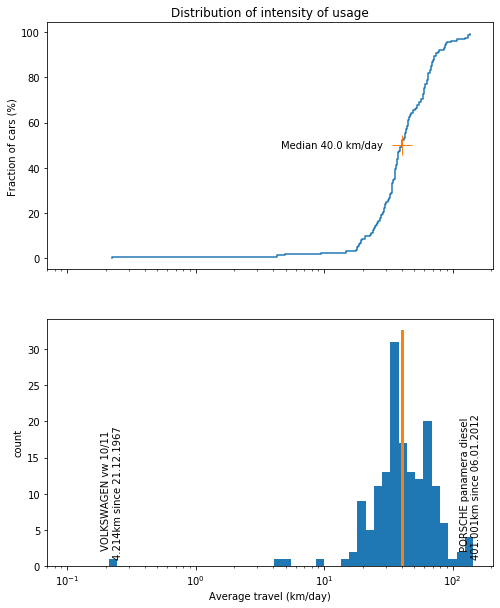

In [16]:
# Plot ecdf and hist
x,y = ecdf(km_p_day)
fig,axs = plt.subplots(ncols=1,nrows=2, figsize=[8,10],sharex=True)

# ecdf
ax = axs[0]
ax.step(x,y*100)
ax.plot(pd.np.median(x),50,'+',markersize=20)
ax.text(pd.np.median(x),50,'Median {:.1f} km/day      '.format(pd.np.median(x)),ha='right',va='center');
ax.set_title('Distribution of intensity of usage')
ax.set_ylabel('Fraction of cars (%)')

xl = axs[0].get_xlim()

# hist
ax = axs[1]
ax.hist(x,bins=pd.np.logspace(-1,pd.np.log10(xl[1]),50))
yl = axs[1].get_ylim()
ax.plot(pd.np.array([1,1])*pd.np.median(x),yl,'-',linewidth=3)
ax.set_xlabel('Average travel (km/day)')
ax.set_ylabel('count')

ax.text(
    km_p_day.min(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmin(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.text(
    km_p_day.max(),1,
    ' {} {}\n{}km since {}'.format(*rdw.loc[km_p_day.idxmax(),['ItemBrand','ItemType','OdoKM','Mfdate']].values),
    rotation=90,
    va='bottom',
    ha='center'
)

ax.set_xscale('log')


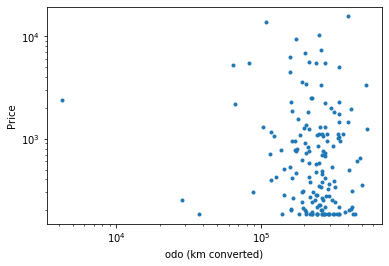

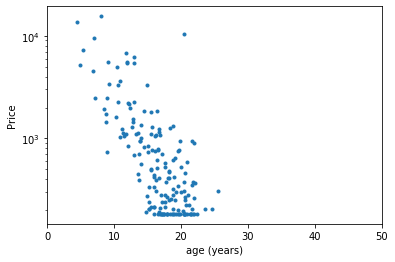

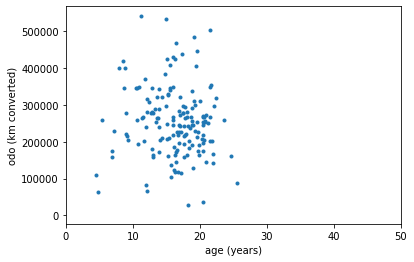

In [17]:
plt.plot(Features.Odo,out,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('odo (km converted)')
plt.ylabel('Price')

plt.figure()
plt.plot(Features.Age_year,out,'.')
plt.yscale('log')
plt.xlabel('age (years)')
plt.ylabel('Price')
plt.xlim(0,50)


plt.figure()
plt.plot(Features.Age_year,Features.Odo,'.')
plt.xlabel('age (years)')
plt.ylabel('odo (km converted)')
plt.xlim(0,50)

plt.show()



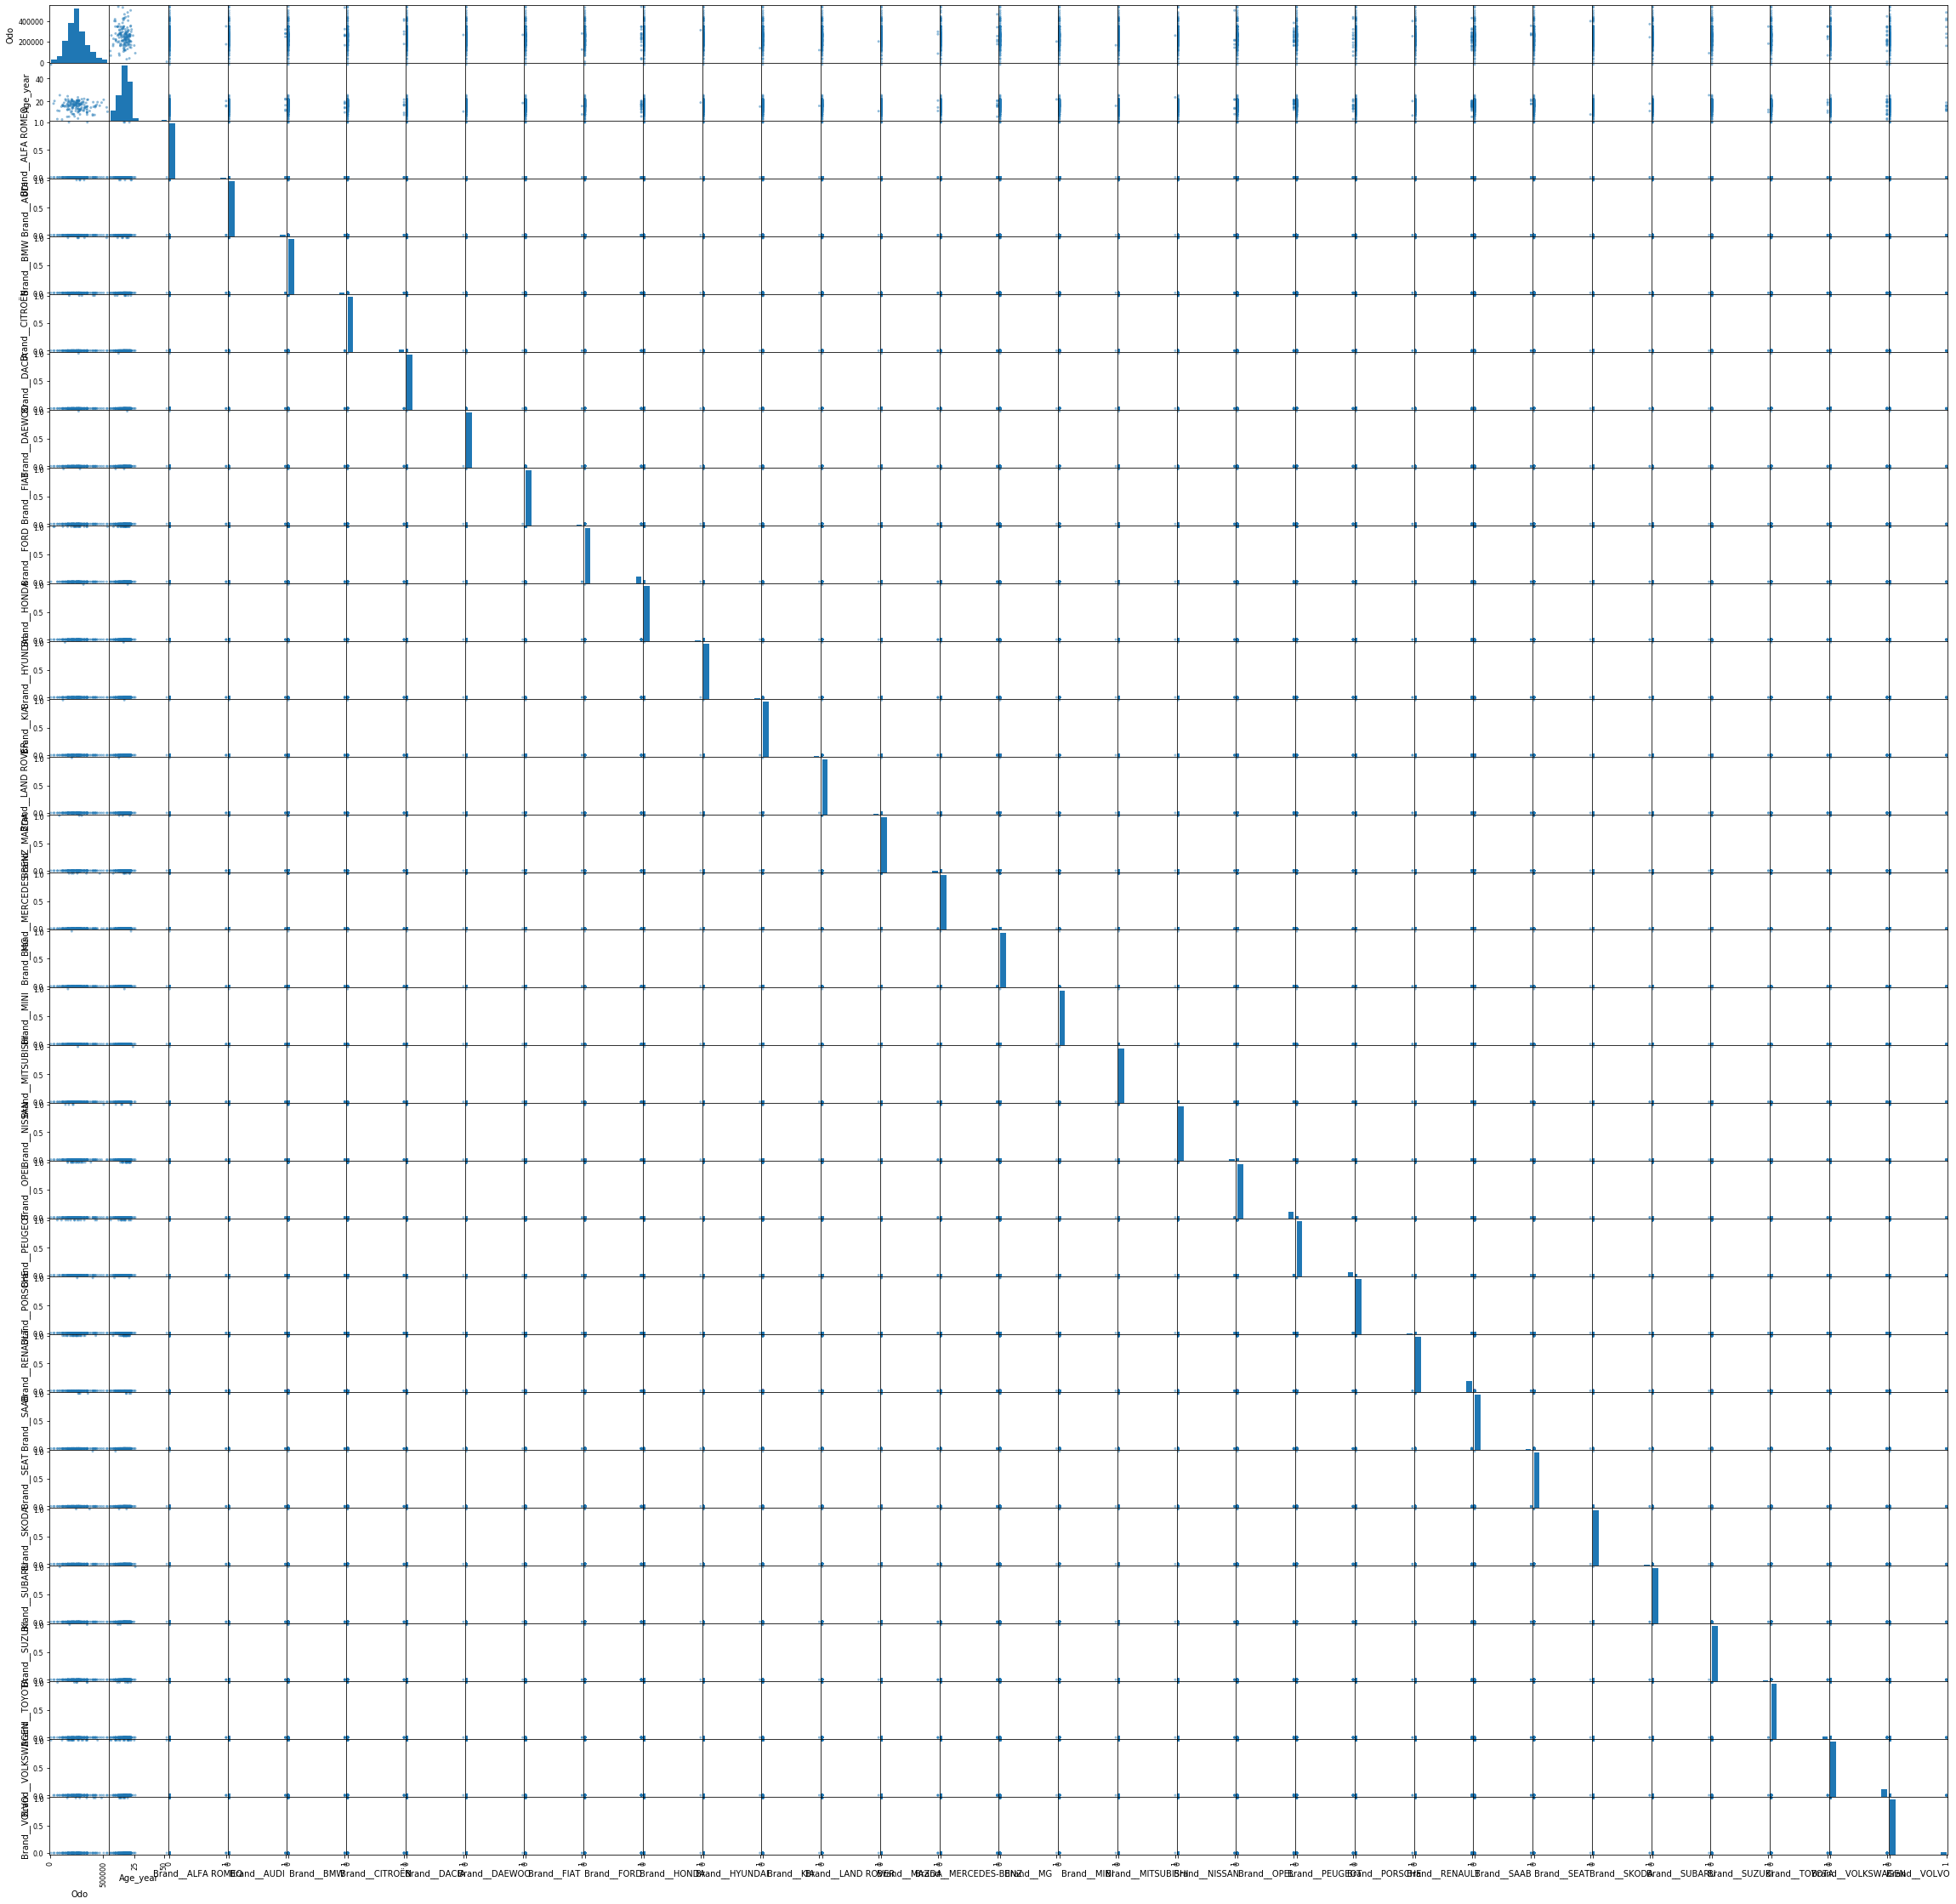

In [18]:
pd.plotting.scatter_matrix(Features,figsize=[40,40])
plt.show()

184.0

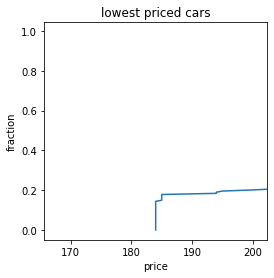

In [34]:
# price
x,y = ecdf(out)
plt.figure(figsize=[4,4])
plt.plot(x,y)
plt.xlim(left=out[out > 0].min()*.9, right=out[out > 0].min()*1.1)
plt.xlabel('price')
plt.ylabel('fraction')
plt.title('lowest priced cars')
# lowest price
out[out > 0].min()